Задание

Морфологические операторы. Убрать мелкие дырки. Объединение объектов. Локализация на кадре объекта (дорожный знак, bar/qr код, регистрационный знак автомобиля и тому подобное). Фон произвольная картинка.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_erosion(img, kernel=np.ones((3,3),np.uint8), numb=1):
    """
    Args:
        img (_type_): картинка
        kernel (_type_, optional): размер ядра поиска дырок. Defaults to np.ones((3,3),np.uint8).
        numb (int, optional): количество итераций. Defaults to 1.
    """
    erosion = cv.erode(img, kernel, iterations = numb)
    return erosion

In [3]:
def get_dilation(img, kernel=np.ones((3,3),np.uint8), numb=1):
    """
    Args:
        img (_type_): картинка
        kernel (_type_, optional): размер ядра поиска дырок. Defaults to np.ones((3,3),np.uint8).
        numb (int, optional): количество итераций. Defaults to 1.
    """
    dilate = cv.dilate(img, kernel, iterations = numb)
    return dilate

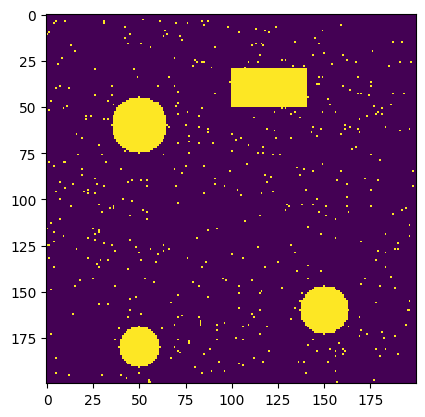

In [4]:
# Создаем изображение из целочисленных значений.
img_bin = np.zeros((200,200), 'uint8')


# Указывается изображение,Центр изображения, радиус,
# цвет (в случае бинарного изображения, соответственно, 1 или 0)
# толщину линии, -1 означает заполнить.
cv.circle( img_bin, (50, 60), 15, 1, -1);
cv.circle( img_bin, (150, 160), 13, 1, -1);
cv.circle( img_bin, (50, 180), 11, 1, -1);

# Отрисовываем прямоугольник.
# Указывается изображение,координаты противоположных уголов,
# цвет и толщину линии.
cv.rectangle( img_bin, (100, 50), (140, 30), 1, -1);

#шум соль
rng = np.random.default_rng(2021)
rng.integers(0, 5, 10)
coords = [rng.integers(0, i, int(500)) for i in img_bin.shape]

img_salt = img_bin.copy()
img_salt[tuple(coords)] = 1

plt.imshow( img_salt, interpolation = 'none' );

 Эрозия

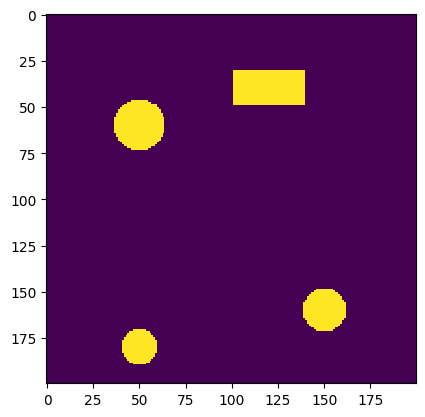

In [5]:
erosion = get_erosion(img_salt)
plt.imshow( erosion, interpolation = 'none' );

 Деляция

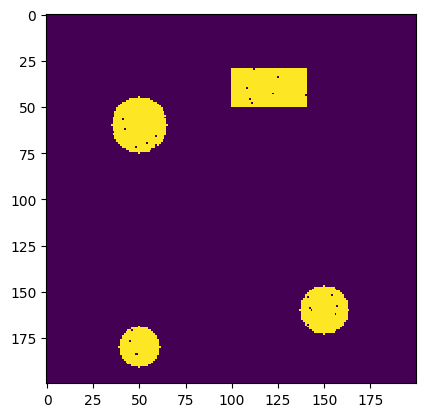

In [6]:
img_pepper = img_bin.copy()
img_pepper[tuple(coords)] = 0

plt.imshow( img_pepper, interpolation = 'none' );

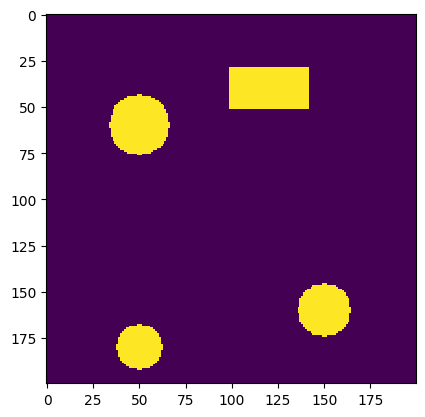

In [7]:
dilate = get_dilation(img_pepper)
plt.imshow( dilate, interpolation = 'none' );

# Объединение объектов

In [8]:
def plot_dilate(img, kernel=np.ones((5,5),np.uint8), numb=4):
    plt.figure(figsize=(16, 6))
    
    #обрезка фото до квадратного
    ax1 = plt.subplot(131)
    if img.shape[1] > img.shape[0]:
        img = img[:, :img.shape[0]]
        
    if img.shape[1] < img.shape[0]:
        img = img[:img.shape[1], :]   
        
    ax1.imshow(img, cmap = 'gray')
    ax1.set_title('Исходное изображение в серых тонах')
    
    
    #превращение в бинарное 
    ax2 = plt.subplot(132)
    ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    ax2.imshow(thresh, cmap = 'gray')
    ax2.set_title('Бинарное изображение')

    ax3 = plt.subplot(133)
    dilate = get_dilation(thresh, kernel, numb)
    ax3.imshow( dilate, interpolation = 'none' );
    ax3.set_title('Соединенные компоненты')
     
     
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

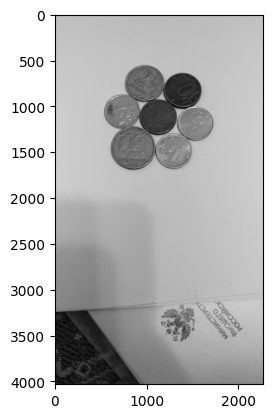

In [9]:
#загрузка фото монет
coins0_row = cv.imread("coins0.jpg")
coins0 = cv.cvtColor(coins0_row, cv.COLOR_BGR2GRAY)
plt.imshow(coins0, cmap = 'gray')

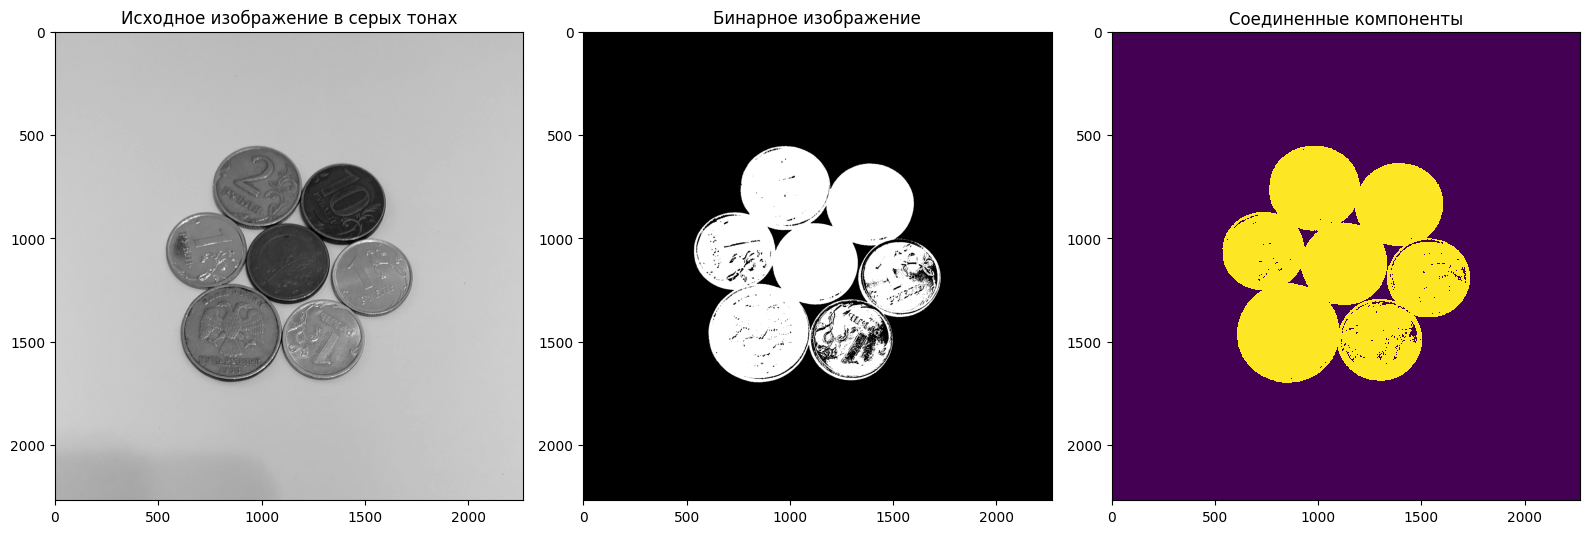

In [10]:
plot_dilate(coins0, np.ones((3,3),np.uint8), 2)

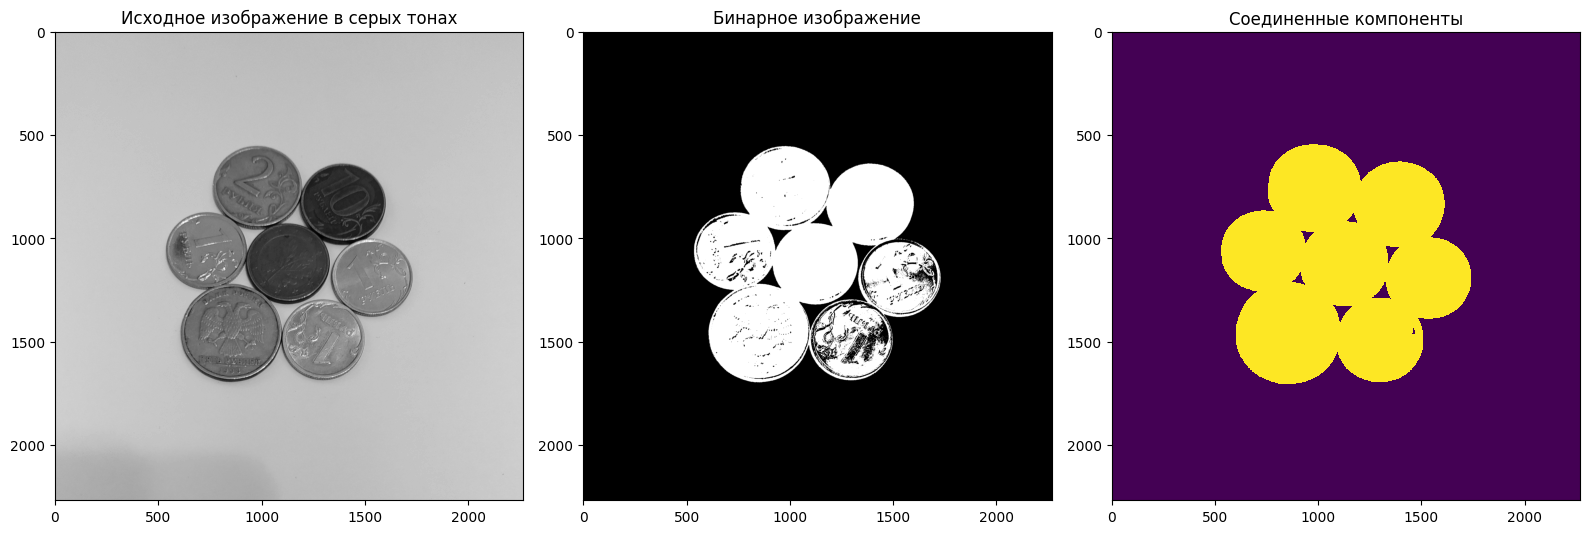

In [11]:
plot_dilate(coins0, np.ones((5,5),np.uint8), 4)

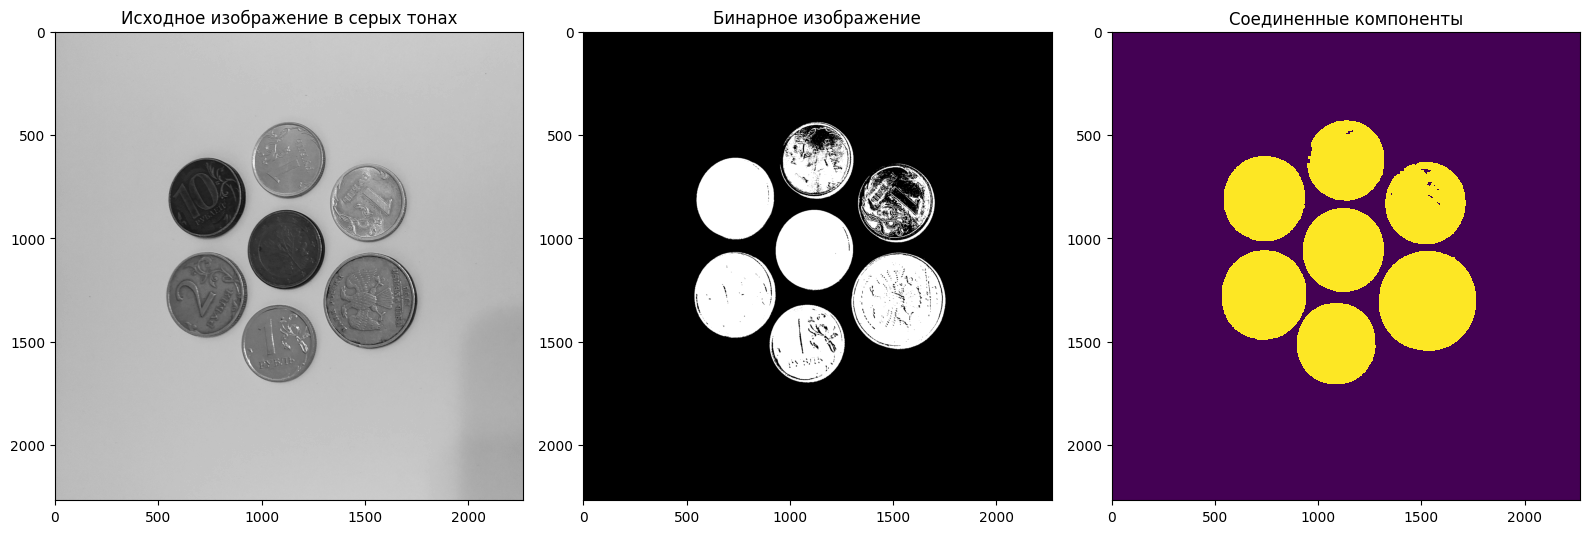

In [12]:
#загрузка фото монет
coins1_row = cv.imread("coins1.jpg")
coins1 = cv.cvtColor(coins1_row, cv.COLOR_BGR2GRAY)
plot_dilate(coins1, np.ones((5,5),np.uint8), 4)

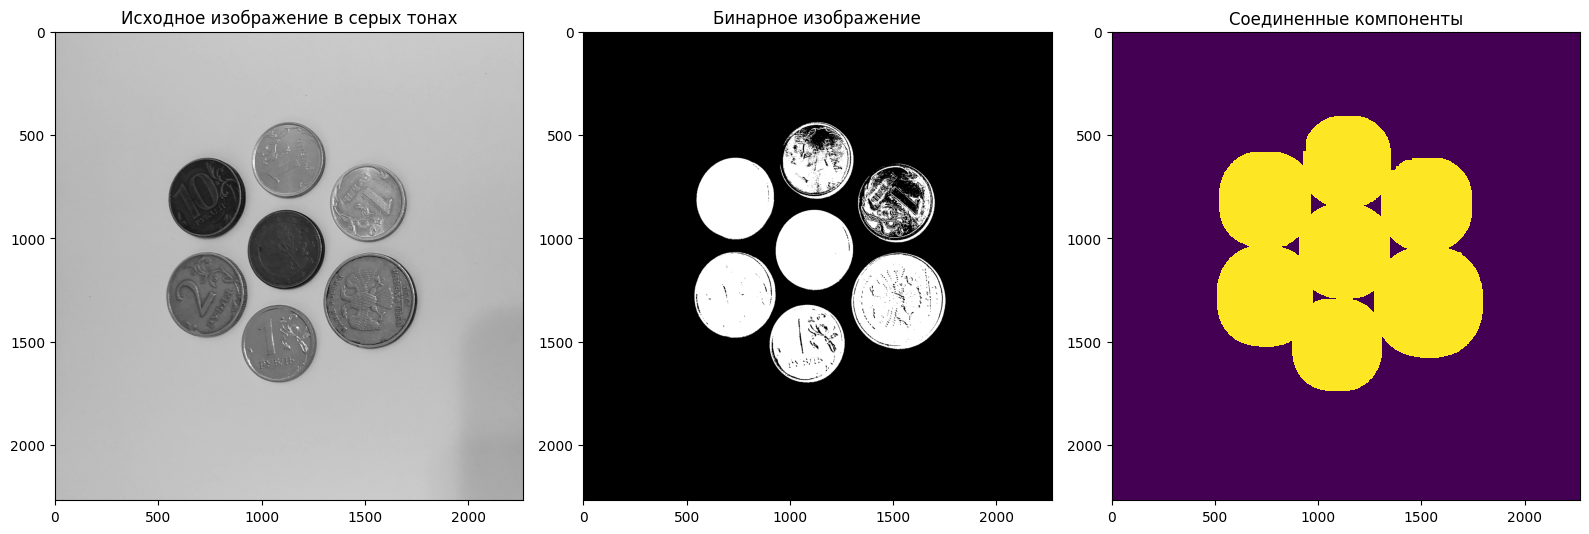

In [13]:
plot_dilate(coins1, np.ones((8,8),np.uint8), 10)

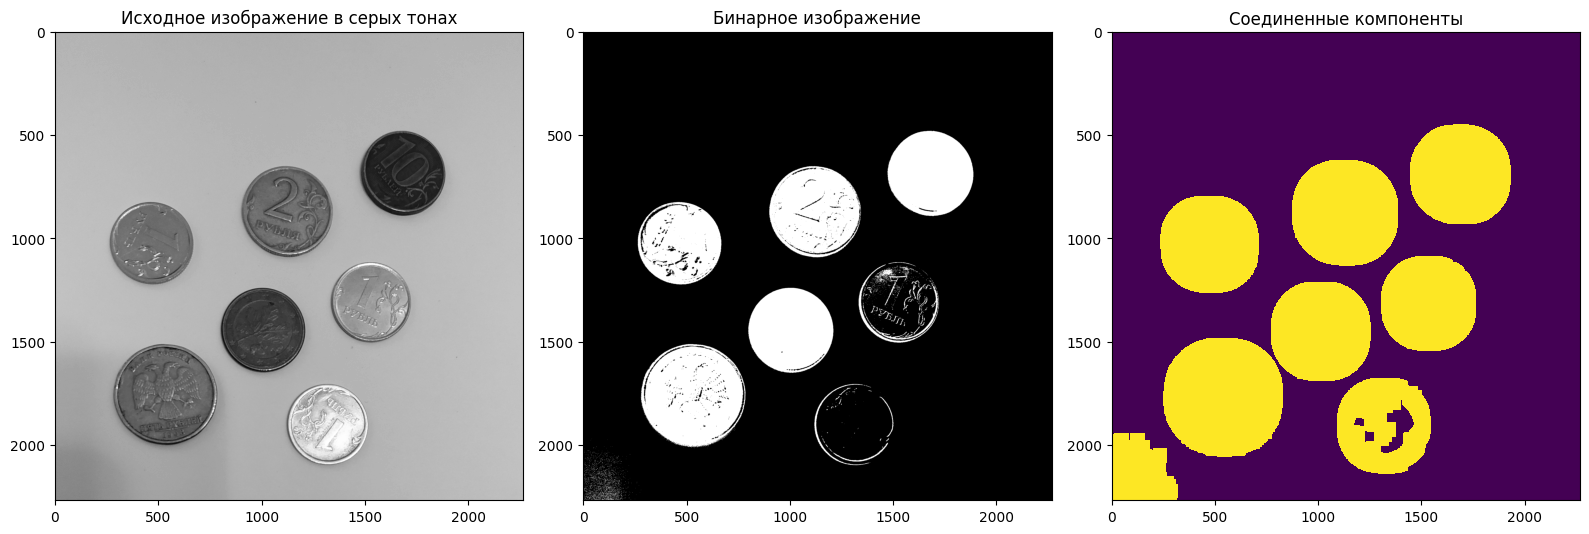

In [14]:
#загрузка фото монет
coins2_row = cv.imread("coins2.jpg")
coins2 = cv.cvtColor(coins2_row, cv.COLOR_BGR2GRAY)
plot_dilate(coins2, np.ones((8,8),np.uint8), 10)

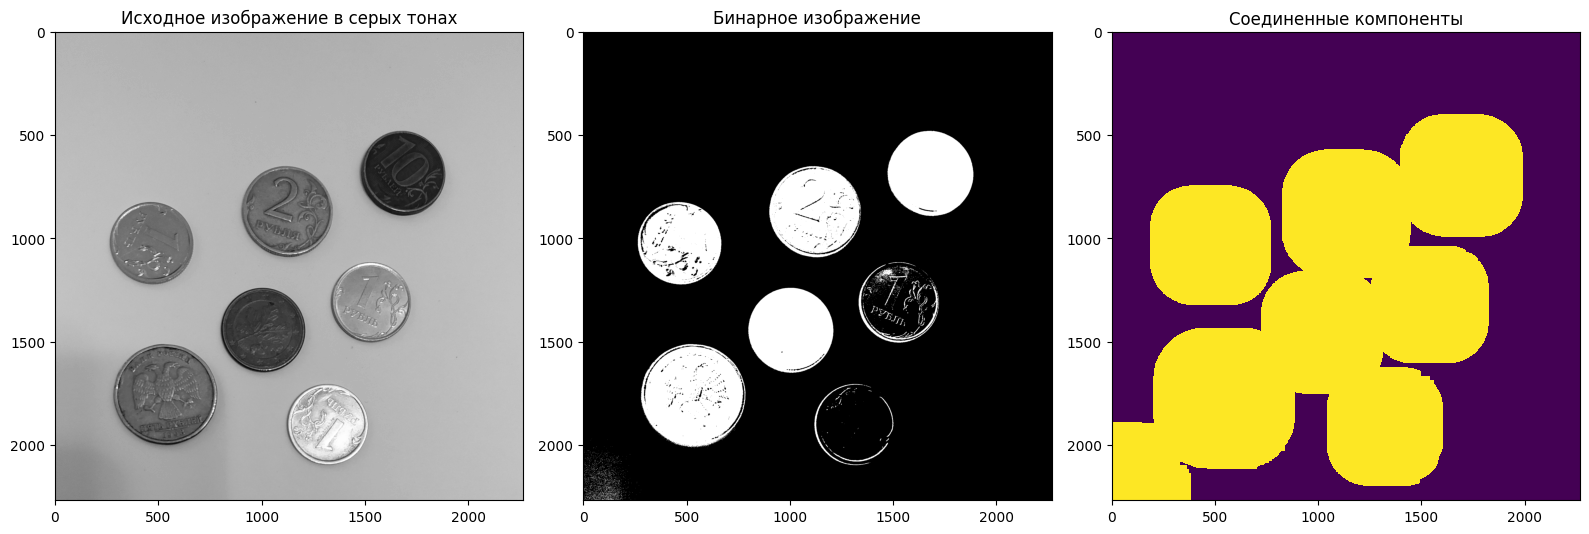

In [15]:
plot_dilate(coins2, np.ones((10,10),np.uint8), 20)

# Поиск штрих кода

In [16]:
def crop_img(img):
    #обрезка фото до квадратного
    
    if img.shape[1] > img.shape[0]:
        img = img[:, :img.shape[0]]
        
    if img.shape[1] < img.shape[0]:
        img = img[:img.shape[1], :]
        
    return img

In [17]:
def prepared_bar_code(img, blur_level=(9, 9)):
    plt.figure(figsize=(10, 6))
    
    ax1 = plt.subplot(231)    
    ax1.imshow(img, cmap = 'gray')
    ax1.set_title('Исходное изображение в серых тонах')
    
    
    # вычисление градиента (Scharr) в направлениях x и y
    ax2 = plt.subplot(232)
    gradX = cv.Sobel(img, ddepth = cv.CV_32F, dx = 1, dy = 0, ksize = -1)
    gradY = cv.Sobel(img, ddepth = cv.CV_32F, dx = 0, dy = 1, ksize = -1)
    # вычитание градиентов
    gradient = cv.subtract(gradX, gradY)
    gradient = cv.convertScaleAbs(gradient)
    ax2.imshow(gradient);
    ax2.set_title('Изображение без градиентов')
    
    
    #размытие 
    ax3 = plt.subplot(233)
    blurred = cv.blur(gradient, blur_level)
    ax3.imshow(blurred)
    ax3.set_title('Изображение с размытием')


    #превращение в бинарное 
    ax4 = plt.subplot(234)
    ret, thresh = cv.threshold(blurred, 128, 255, cv.THRESH_BINARY)
    ax4.imshow(thresh)
    ax4.set_title('Бинарное изображение')


    #выделение элементов
    ax5 = plt.subplot(235)
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (4, 4))
    closed = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
    ax5.imshow(closed);
    ax5.set_title('Элементы изображения')
    
    
    #удаление маленьких компонентов
    ax6 = plt.subplot(236)
    closed = cv.erode(closed, None, iterations = 4)
    closed = cv.dilate(closed, None, iterations = 6)
    ax6.imshow(closed);
    ax6.set_title('Без маленьких компонентов')

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()
    
    return closed

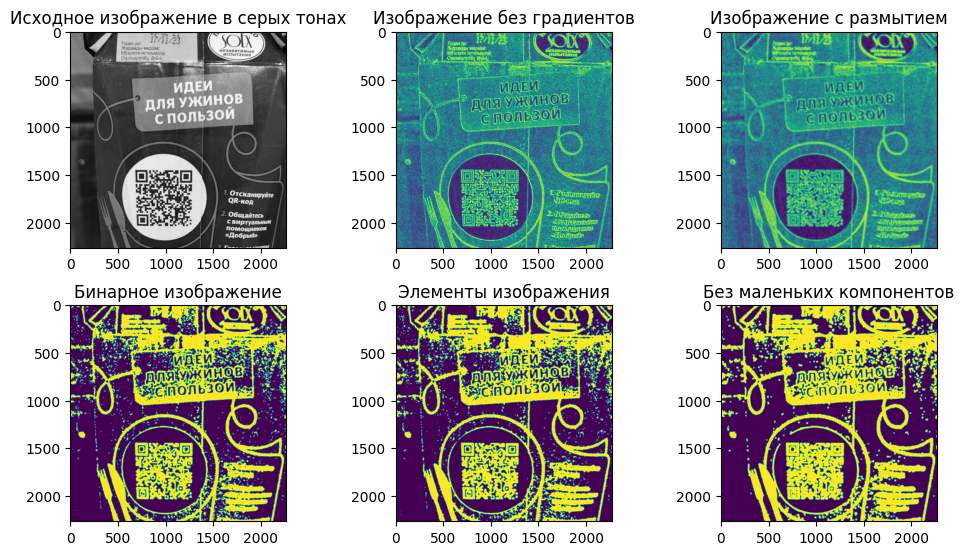

In [18]:
juice_bar_row = cv.imread("juice_bar0.jpg")
juice_bar = cv.cvtColor(juice_bar_row, cv.COLOR_BGR2GRAY)
juice_bar = crop_img(juice_bar)
changed_img = prepared_bar_code(juice_bar, (15,15))

In [19]:
#вырезание области с qrcode
changed_img = changed_img[1000:2500, 500:1500]

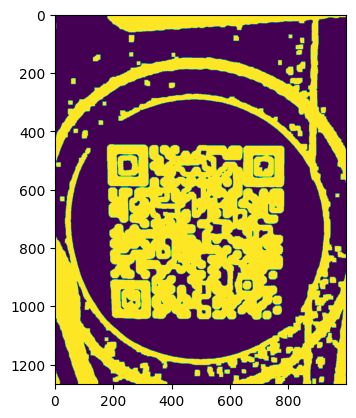

In [20]:
plt.imshow(changed_img)

In [21]:
#выделение qrcode через связанные компоненты
reval, labels, stats, centroids = cv.connectedComponentsWithStats(changed_img)
qr_code_ = sorted(stats, key= lambda stat: stat[cv.CC_STAT_AREA], reverse = True)
qr_code_

[array([     0,      0,   1000,   1268, 697694], dtype=int32),
 array([     0,      0,   1000,   1268, 254077], dtype=int32),
 array([   186,    449,    600,    599, 253084], dtype=int32),
 array([  178,   446,   143,   146, 18556], dtype=int32),
 array([  189,   909,   140,   137, 17345], dtype=int32),
 array([ 182,  594,   84,  122, 7714], dtype=int32),
 array([ 802,  376,   46,   43, 1134], dtype=int32),
 array([ 893, 1174,   32,   41, 1003], dtype=int32),
 array([958, 795,  39,  41, 919], dtype=int32),
 array([745, 999,  32,  32, 881], dtype=int32),
 array([ 710, 1016,   32,   31,  857], dtype=int32),
 array([805, 219,  43,  22, 845], dtype=int32),
 array([731, 879,  31,  31, 833], dtype=int32),
 array([827, 163,  31,  36, 821], dtype=int32),
 array([642, 914,  31,  31, 808], dtype=int32),
 array([791, 180,  26,  30, 668], dtype=int32),
 array([ 521, 1208,   25,   34,  665], dtype=int32),
 array([ 554, 1209,   22,   35,  630], dtype=int32),
 array([ 92, 398,  21,  29, 541], dtype=i

Вывод каждой компоненты

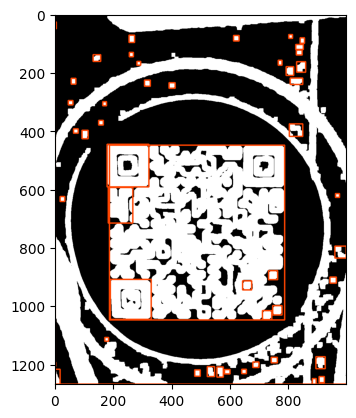

In [22]:
check_img = cv.cvtColor(changed_img.copy(), cv.COLOR_BGR2RGB)
for obj in qr_code_:
    left, top, wight, height, area = obj
    cv.rectangle(check_img, (left,top), (left+wight,top+height), (255, 69, 0), 3);
plt.imshow(check_img, cmap = 'gray')

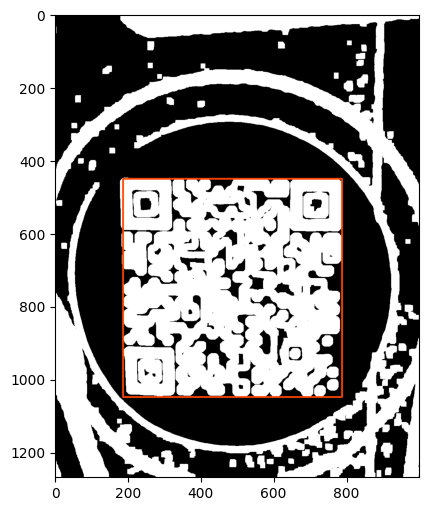

In [23]:
qr_img = cv.cvtColor(changed_img.copy(), cv.COLOR_BGR2RGB)

#визуализация результата
fig = plt.figure(figsize = (10,6))
left, top, wight, height, area = qr_code_[2]
cv.rectangle(qr_img, (left,top), (left+wight,top+height), (255, 69, 0), 4);
plt.imshow(qr_img, cmap = 'gray')